In [6]:
import pandas as pd
import sagemaker
import matplotlib.pyplot as plt
import seaborn as sns
from sagemaker import get_execution_role

In [4]:
# Get the SageMaker execution role
role = get_execution_role()

# Create a SageMaker session
sagemaker_session = sagemaker.Session()

bucket_name = 'udacity-nano-degree-project' 
file_key = 'raw_data/PS_20174392719_1491204439457_log.csv'

# Use the SageMaker session to download the file from S3
s3_client = sagemaker_session.boto_session.client('s3')
s3_client.download_file(bucket_name, file_key, 'local_file.csv')

# Load the data into a pandas DataFrame
df = pd.read_csv('local_file.csv')

# Now you can work with your data as a pandas DataFrame
print(df.head())

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M204

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


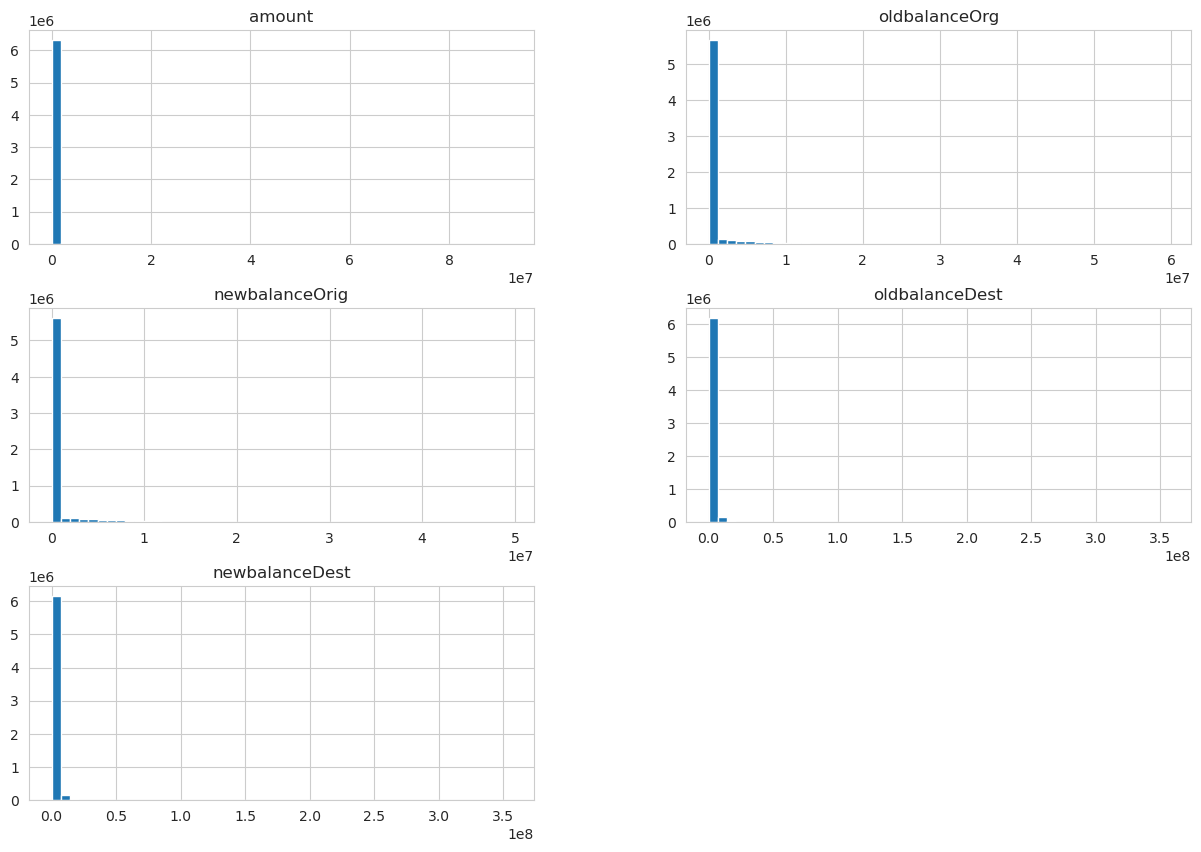

In [7]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Distribution Analysis
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].hist(bins=50, figsize=(15,10))
plt.show()

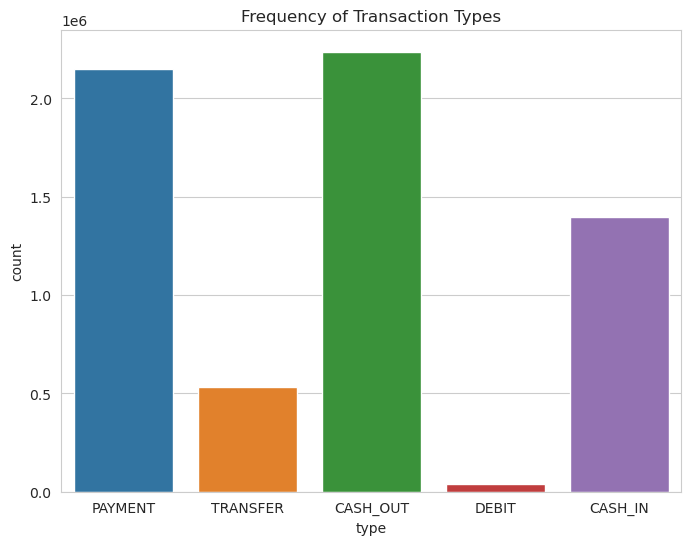

In [8]:
# Transaction Type Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type')
plt.title('Frequency of Transaction Types')
plt.show()

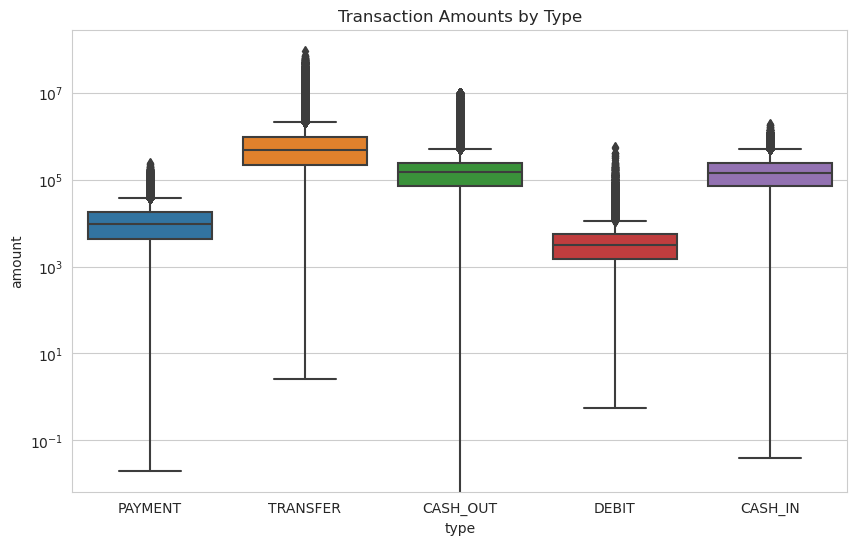

In [9]:
# Boxplot for transaction amounts by type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df)
plt.yscale('log')  # Use logarithmic scale due to wide range of transaction amounts
plt.title('Transaction Amounts by Type')
plt.show()

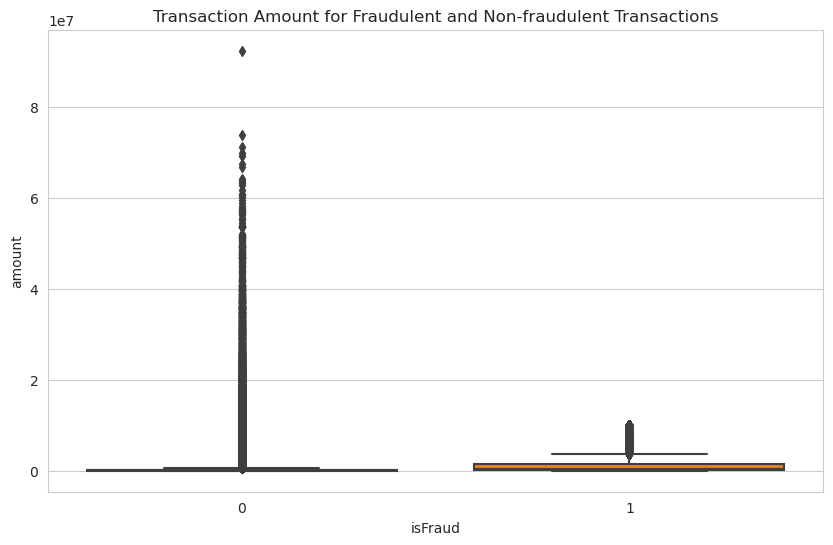

In [10]:
# Fraud Analysis
fraud_cases = df[df['isFraud'] == 1]
non_fraud_cases = df[df['isFraud'] == 0]

# Compare properties using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount for Fraudulent and Non-fraudulent Transactions')
plt.show()

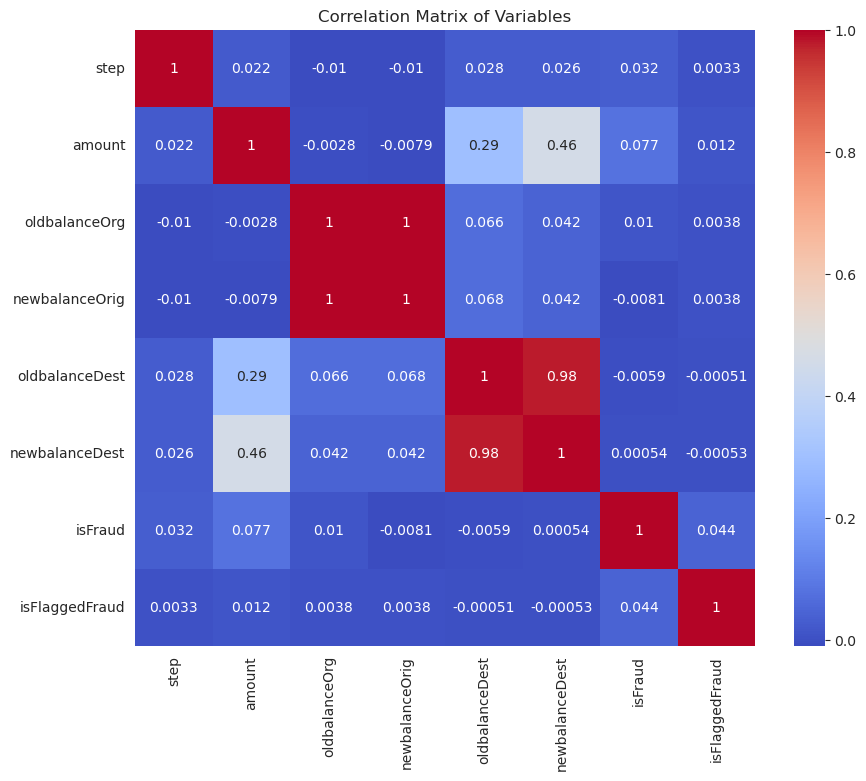

In [11]:
# Flagged Transactions Analysis
flagged = df[df['isFlaggedFraud'] == 1]

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()